In [ ]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl. rcParams['axes.unicode_minus']=False

plt.rc('font', family='NanumBarunGothic')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D492-755A

 C:\Users\USER\python_Data analytics 디렉터리

2021-08-13  오후 03:12    <DIR>          .
2021-08-13  오후 03:12    <DIR>          ..
2021-08-13  오후 03:05    <DIR>          .ipynb_checkpoints
2021-08-13  오후 03:05           295,288 002_Seoul_CCTV.ipynb
2021-08-10  오전 11:12             5,965 01_데이터.ipynb
2021-08-10  오전 11:13            65,556 02_1D_데이터.ipynb
2021-08-10  오후 05:02           113,063 03_2D_데이터.ipynb
2021-08-10  오후 03:07               784 anscombe.npy
2021-08-07  오후 05:53            16,384 notExercise.xls
2021-08-10  오전 09:06               479 scores_em.csv
2021-08-13  오후 02:59             1,135 seoulCCTV.csv
2021-08-13  오후 02:59            19,968 seoulPopulation.xls
2021-08-09  오후 01:09               233 sport_test.csv
2021-08-13  오후 03:12             1,097 서울시 CCTV 현황 분석.ipynb
2021-08-13  오후 03:05           182,419 운동을 안 하는 이유.ipynb
              12개 파일             702,371 바이트
               3개 디렉터리  346,761,723,904 바이트 남음


In [9]:
import pandas as pd
SDF = pd.read_csv('seoulCCTV.csv', encoding='utf-8')
SDF.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [34]:
SDF.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율'], dtype='object')

In [35]:
SDF.rename(columns={SDF.columns[0]:'구별'}, inplace=True)
SDF.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [10]:
SDF.sort_values(by='소계', ascending=True).head(7)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204


In [11]:
SDF.sort_values(by='소계', ascending=False).head(7)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613


In [12]:
SDF['최근증가율']=((SDF['2016년']+SDF['2015년']+SDF['2014년'])/SDF['2013년도 이전'])*100

In [13]:
SDF.sort_values(by='최근증가율', ascending=False).head(7)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195


In [18]:
import pandas as pd
SDFP=pd.read_excel('seoulPopulation.xls',
                    header=2,
                    usecols='B,D,G,J,N')
                  #  encoding='UTF=8')
SDFP.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
SDFP.rename(columns={SDFP.columns[0]:'구별',
                     SDFP.columns[1]:'인구수',
                     SDFP.columns[2]:'한국인',
                     SDFP.columns[3]:'외국인',
                     SDFP.columns[4]:'고령자'}, inplace=True)
SDFP.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [22]:
SDFP.drop([0], inplace=True)

SDFP.head()

KeyError: '[0] not found in axis'

In [23]:
SDFP['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [24]:
SDFP[SDFP['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [25]:
SDFP.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [26]:
SDFP.drop([26],inplace=True)

SDFP.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [27]:
SDFP['외국인비율']=SDFP['외국인']/SDFP['인구수']*100
SDFP['고령자비율']=SDFP['고령자']/SDFP['인구수']*100

SDFP.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [28]:
SDFP.sort_values(by='인구수', ascending=False).head(7)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964


In [29]:
SDFP.sort_values(by='외국인', ascending=False).head(7)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [30]:
SDFP.sort_values(by='외국인비율', ascending=False).head(7)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [31]:
SDFP.sort_values(by='고령자', ascending=False).head(7)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217


In [32]:
SDFP.sort_values(by='고령자비율', ascending=False).head(7)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [36]:
DF=pd.merge(SDF, SDFP, on='구별')
DF.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [40]:
del DF['2013년도 이전']
del DF['2014년']
del DF['2015년']
del DF['2016년']

In [41]:
DF.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [42]:
DF.set_index('구별', inplace=True)
DF.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [43]:
import numpy as np
print(np.corrcoef(DF['고령자비율'], DF['소계']))

[[ 1.         -0.28078554]
 [-0.28078554  1.        ]]


In [44]:
print(np.corrcoef(DF['외국인비율'], DF['소계']))

[[ 1.         -0.13607433]
 [-0.13607433  1.        ]]


In [45]:
print(np.corrcoef(DF['인구수'], DF['소계']))

[[1.         0.30634228]
 [0.30634228 1.        ]]


In [46]:
DF.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [47]:
DF.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


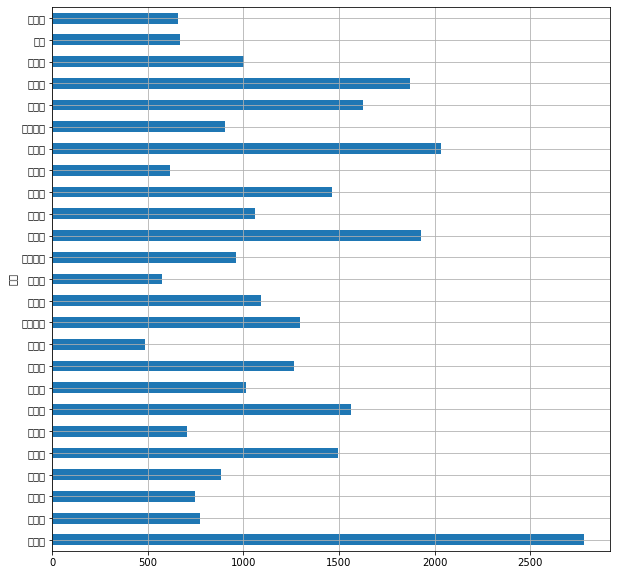

In [48]:
import matplotlib.pyplot as plt
DF['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

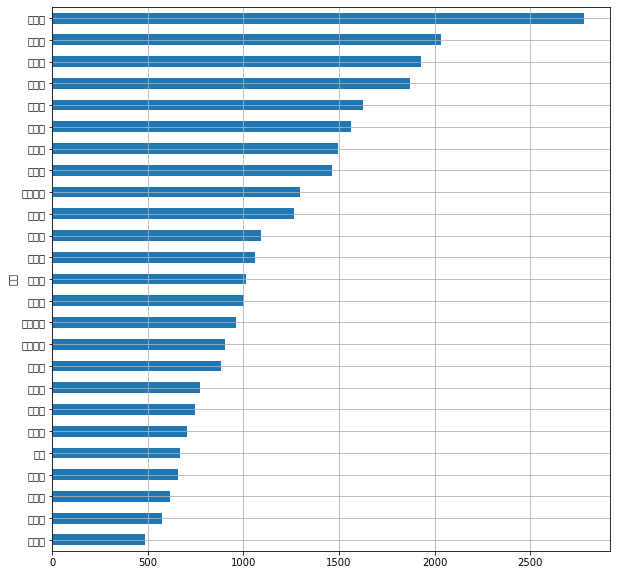

In [51]:
DF['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

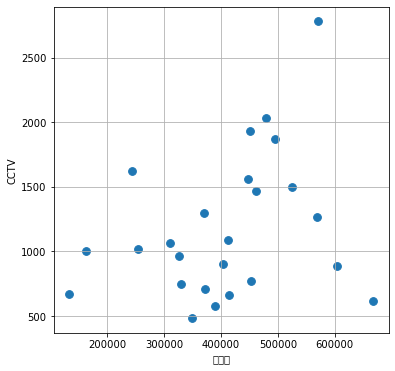

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(DF['인구수'],DF['소계'],  s=60)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [54]:
import numpy as np
np.set_printoptions(suppress=True)
fp1=np.polyfit(DF['인구수'], DF['소계'], 1)
fp1

array([  0.00130916, 645.06649658])

In [55]:
f1=np.poly1d(fp1)
print(f1,'\n')
fx=np.linspace(100000, 700000, 100)
print(fx)

 
0.001309 x + 645.1 

[100000.         106060.60606061 112121.21212121 118181.81818182
 124242.42424242 130303.03030303 136363.63636364 142424.24242424
 148484.84848485 154545.45454545 160606.06060606 166666.66666667
 172727.27272727 178787.87878788 184848.48484848 190909.09090909
 196969.6969697  203030.3030303  209090.90909091 215151.51515152
 221212.12121212 227272.72727273 233333.33333333 239393.93939394
 245454.54545455 251515.15151515 257575.75757576 263636.36363636
 269696.96969697 275757.57575758 281818.18181818 287878.78787879
 293939.39393939 300000.         306060.60606061 312121.21212121
 318181.81818182 324242.42424242 330303.03030303 336363.63636364
 342424.24242424 348484.84848485 354545.45454545 360606.06060606
 366666.66666667 372727.27272727 378787.87878788 384848.48484848
 390909.09090909 396969.6969697  403030.3030303  409090.90909091
 415151.51515152 421212.12121212 427272.72727273 433333.33333333
 439393.93939394 445454.54545455 451515.15151515 457575.75757576
 4

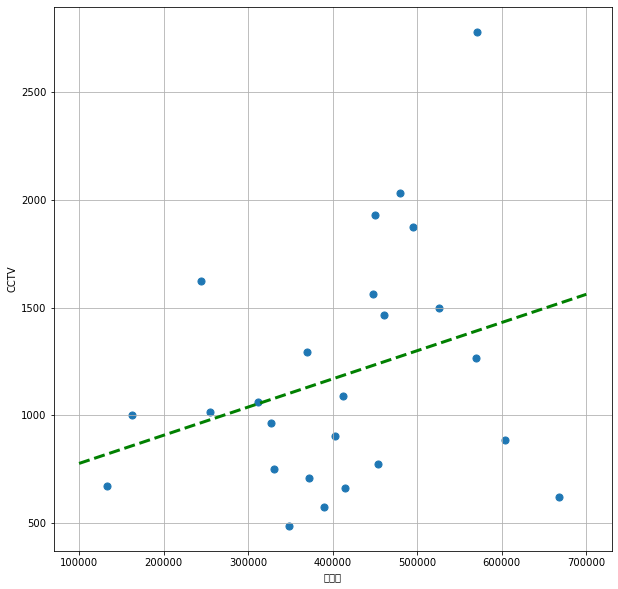

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(DF['인구수'],DF['소계'],  s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [58]:
fp1=np.polyfit(DF['인구수'], DF['소계'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)
DF['오차']=np.abs(DF['소계']-f1(DF['인구수']))
df_sort=DF.sort_values(by='오차',ascending=False)
DF

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,162.948104
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,425.290264
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,329.592918
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,35.989293
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,125.483618


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


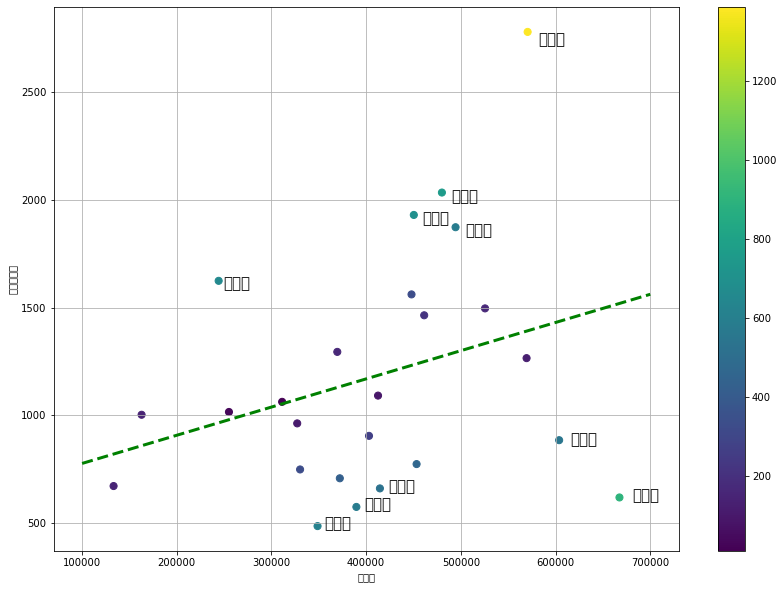

In [61]:
plt.figure(figsize=(14,10))
plt.scatter(DF['인구수'],DF['소계'], c=DF['오차'],  s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,
             df_sort['소계'][n]*0.98,
             df_sort.index[n],
             fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()